 # 處理 outliers
 * 新增欄位註記
 * outliers 或 NA 填補
     1. 平均數 (mean)
     2. 中位數 (median, or Q50)
     3. 最大/最小值 (max/min, Q100, Q0)
     4. 分位數 (quantile)

 # [作業重點]
 - 計算 AMT_ANNUITY 的分位點 (q0 - q100) (Hint : np.percentile, In[3])
 - 將 AMT_ANNUITY 的 NaN 用中位數取代 (Hint : q50, In[4])
 - 將 AMT_ANNUITY 數值轉換到 -1 ~ 1 之間 (Hint : 參考範例, In[5])
 - 將 AMT_GOOD_PRICE 的 NaN 用眾數取代 (In[6])

 # [作業目標]
 - 仿造範例的資料操作, 試著進行指定的離群值處理

 # [作業重點]
 - 計算 AMT_ANNUITY 的分位點 (q0 - q100) (Hint : np.percentile, In[3])
 - 將 AMT_ANNUITY 的 NaN 用中位數取代 (Hint : q50, In[4])
 - 將 AMT_ANNUITY 數值轉換到 -1 ~ 1 之間 (Hint : 參考範例, In[5])
 - 將 AMT_GOOD_PRICE 的 NaN 用眾數取代 (In[6])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

# 設定 data_path
dir_data = './data/'



In [3]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

# 設定 data_path
dir_data = './data/'



In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()


Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


 ## 1. 列出 AMT_ANNUITY 的 q0 - q100
 ## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
 ## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
 ## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [5]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [6]:
# 1: 計算 AMT_ANNUITY 的 q0 - q100
app_train['AMT_ANNUITY'].describe()
q0_100 = app_train["AMT_ANNUITY"].quantile([i/100 for i in range(101)])


pd.DataFrame({'q': list(range(101)),
              'value': q0_100})

,q,value
0.00,0,1615.50
0.01,1,6182.91
0.02,2,6750.00
0.03,3,7875.00
0.04,4,8703.00
0.05,5,9000.00
0.06,6,9000.00
0.07,7,9553.50
0.08,8,10125.00
0.09,9,10503.00


In [7]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

"""
Your Code Here
"""
q_50 = q0_100[50]

app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))


Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12


KeyError: 50.0

In [8]:
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))


Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12


In [9]:
q_50 = q0_100[50]

KeyError: 50.0

In [10]:
print(q0_100)

0.00      1615.50
0.01      6182.91
0.02      6750.00
0.03      7875.00
0.04      8703.00
0.05      9000.00
0.06      9000.00
0.07      9553.50
0.08     10125.00
0.09     10503.00
0.10     11074.50
0.11     11430.00
0.12     11970.00
0.13     12375.00
0.14     12838.50
0.15     13302.00
0.16     13500.00
0.17     13500.00
0.18     13896.00
0.19     14350.50
0.20     14701.50
0.21     15124.50
0.22     15583.50
0.23     15970.50
0.24     16209.00
0.25     16524.00
0.26     16852.50
0.27     17109.00
0.28     17487.00
0.29     17806.50
          ...    
0.71     32458.50
0.72     32895.00
0.73     33376.50
0.74     33984.00
0.75     34596.00
0.76     35345.16
0.77     35806.50
0.78     36328.50
0.79     36747.00
0.80     37516.50
0.81     37948.50
0.82     38556.00
0.83     39456.00
0.84     40135.50
0.85     40806.00
0.86     41845.50
0.87     42790.50
0.88     43735.50
0.89     44991.00
0.90     45954.00
0.91     47254.50
0.92     48465.00
0.93     49878.00
0.94     51745.50
0.95     5

In [11]:
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
app_train['AMT_ANNUITY'].describe()
q0_100 = app_train["AMT_ANNUITY"].quantile([i for i in range(101)])
pd.DataFrame({'q': list(range(101)),'value': q0_100})

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-11-6103be285438>, line 5)

In [12]:
# 1: 計算 AMT_ANNUITY 的 q0 - q100
app_train['AMT_ANNUITY'].describe()
q0_100 = app_train["AMT_ANNUITY"].quantile([i for i in range(101)])
pd.DataFrame({'q': list(range(101)),'value': q0_100})

ValueError: percentiles should all be in the interval [0, 1]. Try [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ] instead.

In [13]:
# 1: 計算 AMT_ANNUITY 的 q0 - q100
app_train['AMT_ANNUITY'].describe()
q0_100 = app_train["AMT_ANNUITY"].quantile([i/100 for i in range(101)])
pd.DataFrame({'q': list(range(101)),'value': q0_100})

,q,value
0.00,0,1615.50
0.01,1,6182.91
0.02,2,6750.00
0.03,3,7875.00
0.04,4,8703.00
0.05,5,9000.00
0.06,6,9000.00
0.07,7,9553.50
0.08,8,10125.00
0.09,9,10503.00


In [14]:
print(pd)

<module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>


In [15]:
print(q0_100)

0.00      1615.50
0.01      6182.91
0.02      6750.00
0.03      7875.00
0.04      8703.00
0.05      9000.00
0.06      9000.00
0.07      9553.50
0.08     10125.00
0.09     10503.00
0.10     11074.50
0.11     11430.00
0.12     11970.00
0.13     12375.00
0.14     12838.50
0.15     13302.00
0.16     13500.00
0.17     13500.00
0.18     13896.00
0.19     14350.50
0.20     14701.50
0.21     15124.50
0.22     15583.50
0.23     15970.50
0.24     16209.00
0.25     16524.00
0.26     16852.50
0.27     17109.00
0.28     17487.00
0.29     17806.50
          ...    
0.71     32458.50
0.72     32895.00
0.73     33376.50
0.74     33984.00
0.75     34596.00
0.76     35345.16
0.77     35806.50
0.78     36328.50
0.79     36747.00
0.80     37516.50
0.81     37948.50
0.82     38556.00
0.83     39456.00
0.84     40135.50
0.85     40806.00
0.86     41845.50
0.87     42790.50
0.88     43735.50
0.89     44991.00
0.90     45954.00
0.91     47254.50
0.92     48465.00
0.93     49878.00
0.94     51745.50
0.95     5

In [16]:
print(type(q0_100))

<class 'pandas.core.series.Series'>


In [17]:

q_50 = np.percentile(app_train[~app_train["AMT_ANNUITY"].isnull()]["AMT_ANNUITY"], q = 50)


In [18]:
print(q_50)

24903.0


In [19]:
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))
q_50 = np.percentile(app_train[~app_train["AMT_ANNUITY"].isnull()]["AMT_ANNUITY"], q = 50)
print(q_50)
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))


Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
24903.0
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


In [20]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))
q_50 = np.percentile(app_train[~app_train["AMT_ANNUITY"].isnull()]["AMT_ANNUITY"], q = 50)
print(q_50)
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50
#在移除 NA 之後, numbers of AMT_ANNUITY: 0
print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))


Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 0
24903.0
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


 ### Hints: Normalize function (to -1 ~ 1)
 $ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [21]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()



== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [22]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    ((( x - min(x) ) / ( max(x) - min(x) ))-0.5) * 2
    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [23]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    x=((( x - min(x) ) / ( max(x) - min(x) ))-0.5) * 2
    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()



== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


count    307511.000000
mean         -0.801154
std           0.113049
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

== Normalized data range ==


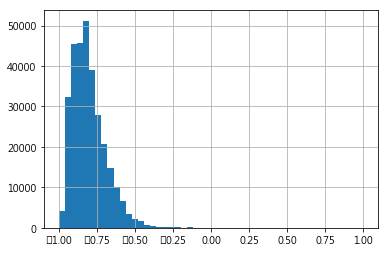

In [24]:
print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()
app_train['AMT_ANNUITY_NORMALIZED'].hist(bins = 50)

== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


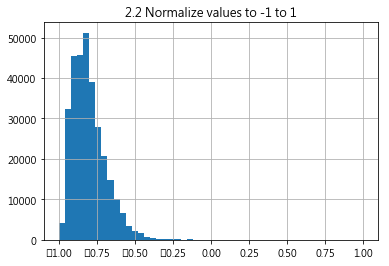

In [25]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    x=((( x - min(x) ) / ( max(x) - min(x) ))-0.5) * 2    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()
app_train['AMT_ANNUITY_NORMALIZED'].hist(bins = 50)
plt.title("2.2 Normalize values to -1 to 1")
plt.show()


In [26]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))



Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278


In [27]:
# 3 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [28]:
AMT_GOODS_PRICE_NA = app_train[ ~ app_train["AMT_GOODS_PRICE"].isnull()]["AMT_GOODS_PRICE"]

In [29]:

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]



In [30]:
print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))




After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0
